# Лабораторная работа по машинному обучению
## Выполнил студент группы 15-В-1 Марухин Михаил
## Вариант 13 (bike)
## Кодировка классификаторов:
## 1 – линейная регрессия без использования регуляризаторов;
## 2 – линейная регрессия, LASSO регуляризатор.
### Цель лабораторной работы – получение навыков работы с методами регрессии.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr, spearmanr

from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('day.csv')

D:\Program Files\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


### 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

instant- Индекс записи    
dteday- Дата    
season- Сезон    
yr- Год    
mnth- Месяц    
hr- Час    
holiday- Погода в праздник    
weekday- День недели    
workingday- Рабочий день    
weathersit- Погода    
temp- Температура    
atemp- Температура по собственным ощущениям    
hum- Влажность    
windspeed- Скорость ветра    
casual- Количество случайных пользователей    
registered: Количество зарегистрированных пользователей    
cnt- Количество всех прокатных велосипедов, включая как случайные, так и зарегистрированные

### 2. Удалите дубликаты строк в наборе данных. Приведите размер набора данных до и после данной операции.

In [4]:
df.shape

(731, 16)

In [5]:
df = df.dropna()
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df.shape

(731, 16)

### 3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию).

In [6]:
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
categorial:  ['dteday']


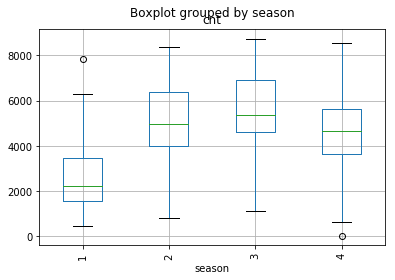

In [7]:
df.boxplot(column='cnt',by='season',rot=90)
plt.show()

In [8]:
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [9]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.000000,2011-01-01,0.0,0.0,0.0,0.0,1.000000,0.0,0.5,0.355170,0.373517,0.828620,0.284606,0.096538,0.091539,0.110792
1,0.001370,2011-01-02,0.0,0.0,0.0,0.0,0.000000,0.0,0.5,0.379232,0.360541,0.715771,0.466215,0.037852,0.093849,0.089623
2,0.002740,2011-01-03,0.0,0.0,0.0,0.0,0.166667,1.0,0.0,0.171000,0.144830,0.449638,0.465740,0.034624,0.174560,0.152669
3,0.004110,2011-01-04,0.0,0.0,0.0,0.0,0.333333,1.0,0.0,0.175530,0.174649,0.607131,0.284297,0.031103,0.207046,0.177174
4,0.005479,2011-01-05,0.0,0.0,0.0,0.0,0.500000,1.0,0.0,0.209120,0.197158,0.449313,0.339143,0.023474,0.216286,0.181546


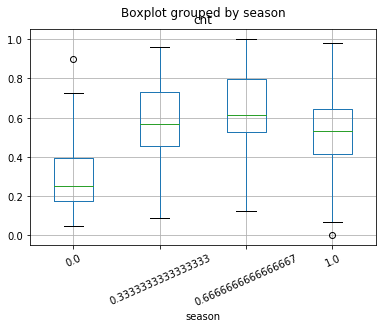

In [10]:
df.boxplot(column='cnt',by='season',rot=24)
plt.show()

### 4. Выполните замену категориальных признаков. Выберите и обоснуйте способ замены.

Категориальных признаков нет.

### 5. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других.

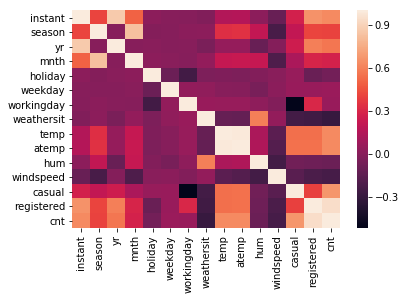

In [11]:
#corr_matrix = df.drop(['id','date','waterfront','view','zipcode','lat','long'], axis=1).corr()
corr_matrix = df.corr()
sns.heatmap(corr_matrix);
plt.show()

### 6. Заполните пропущенные значения в данных.

Пропущенных значений нет.

### 7. Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказаннымс учётом p-value.

In [12]:
# Линейная регрессия, LASSO регуляризатор.
X, y = df.drop(['cnt','dteday'], axis=1), df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
reg = linear_model.Lasso (alpha = 0.1)
reg.fit (X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
reg.coef_

array([  2.98317187e-15,  -1.11022302e-16,  -1.55431223e-15,
        -1.70696790e-15,  -5.55111512e-17,   6.93889390e-17,
        -3.33066907e-16,  -4.44089210e-16,   2.77555756e-17,
         1.02695630e-15,   7.91033905e-16,   1.73472348e-16,
         3.92084676e-01,   7.96824666e-01])

In [24]:
xt = reg.predict(X_test)
print(xt[:10])

[ 0.7361942   0.38736769  0.25655775  0.42855499  0.53911643  0.49148642
  0.47146802  0.70536125  0.84134837  0.50080534]


In [25]:
print(y_test[:10])

488    0.736194
421    0.387368
91     0.256558
300    0.428555
177    0.539116
217    0.491486
269    0.471468
443    0.705361
543    0.841348
402    0.500805
Name: cnt, dtype: float64


In [26]:
print(xt[:10]-y_test[:10])

488   -1.110223e-16
421    1.110223e-16
91    -1.110223e-16
300   -4.440892e-16
177   -1.110223e-16
217    5.551115e-17
269    1.110223e-16
443    2.220446e-16
543   -1.110223e-16
402    1.110223e-16
Name: cnt, dtype: float64


In [27]:
reg.intercept_

-4.4408920985006262e-16

In [28]:
# Линейная регрессия без использования регуляризаторов;
X, y = df.drop(['cnt','dteday'], axis=1), df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
reg.coef_

array([  2.98317187e-15,  -1.11022302e-16,  -1.55431223e-15,
        -1.70696790e-15,  -5.55111512e-17,   6.93889390e-17,
        -3.33066907e-16,  -4.44089210e-16,   2.77555756e-17,
         1.02695630e-15,   7.91033905e-16,   1.73472348e-16,
         3.92084676e-01,   7.96824666e-01])

In [31]:
reg.intercept_

-4.4408920985006262e-16

In [32]:
corr={}
corr['pearson'], _ = pearsonr(xt,y_test)
corr['spearman'], _ = spearmanr(xt,y_test)
print(corr['pearson'])
print(corr['spearman'])

1.0
0.999999436502
